#  Styling plots in matplotlib and seaborn

- A style sheet is an rcParams config file, which only includes plot-styling parameters. Multiple style sheets can be combined/cascaded by providing them as a list. 

- You may use predefined style sheets from seaborn or matplotlib. You may also chain/cascade them with your custom styles. 

- Styles can be applied globally, which affects all plots after the style sheet has been set, or using context managers for temporary changes.  

- `sns.set_context` avails styles for auto-scaling your graphics to different media like notebook, talk (presentations), paper or posters. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from cycler import cycler
%matplotlib inline

Here's an example of an update to an `rcParams` setting that is global and affects all plots defined after it

In [2]:
plt.rcParams["figure.facecolor"] = 'white'

### Setting up some dummy data for the rest of the examples

In [3]:
RNG = np.random.default_rng( 7234) 
x = RNG.integers(low=0, high=12, size=100)
m = RNG.random()*2
c = RNG.random()*1
y = x*m + c 


## 1. Basic plotting using the defaults

Different ways to create plots, such as using `matplotlib.pyplot` or `seaborn`. Seaborn is a higher level interface 

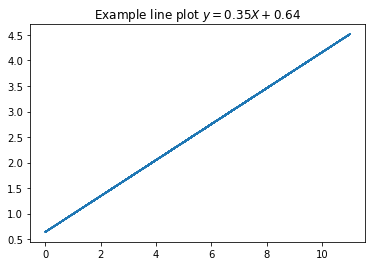

In [4]:
## ==== Line plot example 
plt.plot(x, y)
plt.title(f'Example line plot $y = {np.mean(m):.2f} X + {np.mean(c):.2f} $')
plt.show();

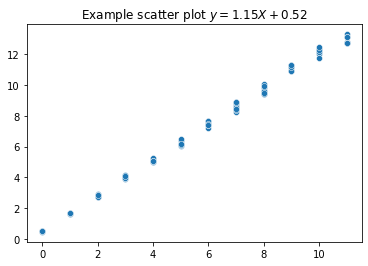

In [5]:
### ==== Scatter example using seaborn
m = RNG.random()*2 + RNG.random( len(x) )*.1
c = RNG.random()*1 + RNG.random( len(x) )*.1
y = x*m + c 
ax = sns.scatterplot(x=x, y=y)
ax.set_title(f'Example scatter plot $y = {np.mean(m):.2f} X + {np.mean(c):.2f} $')
plt.show();

## 2. Style sheets

See predefined style sheets from `matplotlib` and `seaborn`

In [6]:
print( plt.style.available )

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


**Set a global style sheet and a presentation media context for scaling purposes**

This will affect all subsequent plots

In [7]:
plt.style.use( 'ggplot') #'fivethirtyeight') 
sns.set_context('paper')

First, setting up some dummy data

In [8]:
## 1. dummy data
x = RNG.integers(low=0, high=12, size=1000) 
m = RNG.random()*2 + RNG.random( len(x) )*.3
c = RNG.random()*1 + RNG.random( len(x) )*.5
y = x*m + c 
# bins for categorical variable  z 
bins = [np.quantile(y, q) for q in (.25, .5, .75,)]
z = np.digitize(y, bins)
z_cats = np.unique( z )

### 2.1. Styling using inline code
- `Axes` setters and properties 
- Runtime `rcParams` settings updates

In [9]:
## ---- helper for updating box plot artist so that the lines/edges take on the same color as the facecolor of the box

def update_box_artist(ax):
    # iterate over boxes
    for i,box in enumerate(ax.artists):
        fc  = box.get_facecolor()
        box.set_edgecolor( fc )
        
        print( j, fc)

        # iterate over whiskers and median lines
        for j in range(6*i,6*(i+1)):
             ax.lines[j].set_color( fc )

First we define a figure object that can plot multiple plots. In this case it has 1 row and 2 columns for a total of two plots

Secondly we define some styling properties for a boxplot. These properties are defined as dicts and will be used by both the `matplotlib` plot and the `seaborn` plot. 

Thirdly, we create a `matplotlib` boxplot on the first axes of the figure. 

Fourthly, we create a `seaborn` boxplot on the second axes of the figure. Notice the following,

- Any parameter that can be passed to the `matplotlib` box plot can be passed to the `seaborn` boxplot 
- `Seaborn` has some additional properties that make it nicer to work with. For instance, we can set the boxplot faceolor by simply setting the variable `hue` during constraction of the boxplot and automatically generates a legend. For matplot, we have to iterate over the boxplot `artist` objects ourselves. 
- 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


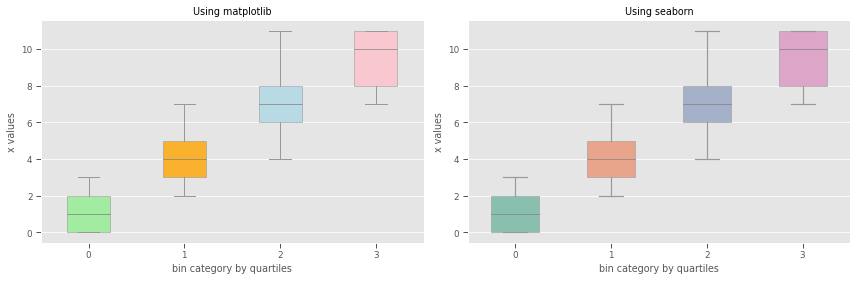

In [10]:
## 1. Plotting figure 
fig, axz = plt.subplots( 1, 2, figsize=(6*2,4))
axz = axz.flatten()

## 2. Some boxplot style definitions; setup when creating the plot 
## all these can be defined in rcParams config file as well. 
showfliers = False 
showcaps = True 
linecolor = '#999'
medprops = dict(color='gray',linewidth=.7, linestyle='-',)
boxprops = dict(color=linecolor,linewidth=.7,alpha=.8, )
capprops = dict(color=linecolor,)
whisprops = dict(color=linecolor)



## 3.1. plot with plt 
z_update = [ np.array([xi for xi,i in zip(x,z) if i==zi]) for zi in np.unique(z)] 
box_props = axz[0].boxplot( z_update ,    ## plt.boxplot returns a dict with different properties 
               labels=np.unique( z ),                
               patch_artist = True,       ## avail artist for further customization
               showfliers=showfliers,     ## whether to show outliers
               showcaps=showcaps,          
               medianprops = medprops,
               boxprops = boxprops,        ## additional box style
               capprops = capprops,
               whiskerprops=whisprops
               )

## 3.2. set fill color using artist patch else everything has same color 
colors = ['lightgreen', 'orange', 'lightblue','pink' ] 
for box_patch, col in zip(box_props['boxes'], colors):
    box_patch.set_facecolor( col )
    
    

## 4.1 plot with sns and its abstraction on some of the properties 
## Notice how plt arguments can also passed to sns plots, since sns is an abstraction of plt
sax = sns.boxplot(x=z, y=x, 
                  dodge=False,
                  showfliers=showfliers, ## plt.boxplot properties
                  showcaps=showcaps,
                  medianprops = medprops,
                  boxprops = boxprops,
                  capprops = capprops,
                  whiskerprops=whisprops,
                  hue=z,                  ## sns additional abstractions                   
                  width=.5 ,
                  palette="Set2",
                  ax=axz[1]               ## passing axes object 
                 )



## 5.1 Set axes properties and additional inline settings
x_label = 'bin category by quartiles'
y_label = 'x values'

## 5.2 Updating the axes objects and ploting a figure with multiple plots
for ax, t in [(axz[0], 'Using matplotlib'),
              (sax, 'Using seaborn'),]:
    ## i.setter functions  
    ax.set_title( t )
    ax.set_xlabel( x_label )
    ax.set_ylabel( y_label)
    ## ii.access elements directly 
    ax.grid(visible=False, axis='x')
    for spine in ['left', 'bottom']:        
        ax.spines[spine].set_visible(True)
    for spine in ['right', 'top']:        
        ax.spines[spine].set_visible(False)
    ax.legend().remove()                     ## sns auto-gens legend 
    ## iii. additional changes to the artist - match boxborder and box fill colors
    update_box_artist( ax )


plt.tight_layout()
plt.show()

**Temporarily using a customer style sheet together with a predefined one to make the same plots**


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


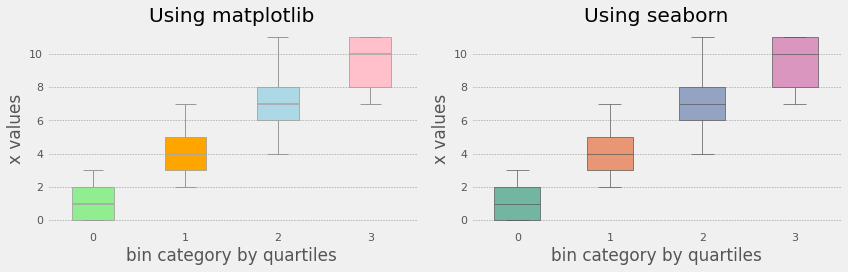

In [11]:

sns.set_context('notebook')
with plt.style.context( ['fivethirtyeight', 'mystyler.txt']): 
    ## 1. Plotting figure 
    fig, axz = plt.subplots( 1, 2, figsize=(6*2,4))
    axz = axz.flatten()

    ## 3.1. plot with plt 
    z_update = [ np.array([xi for xi,i in zip(x,z) if i==zi]) for zi in np.unique(z)] 
    box_props = axz[0].boxplot( z_update ,    ## plt.boxplot returns a dict with different properties 
                   labels=np.unique( z ),                
                   patch_artist = True,       ## avail artist for further customization
                   )

    ## 3.2. set fill color using artist patch else everything has same color 
    colors = ['lightgreen', 'orange', 'lightblue','pink' ] 
    for box_patch, col in zip(box_props['boxes'], colors):
        box_patch.set_facecolor( col )



    ## 4.1 plot with sns and its abstraction on some of the properties 
    ## Notice how plt arguments can also passed to sns plots, since sns is an abstraction of plt
    sax = sns.boxplot(x=z, y=x, 
                      dodge=False,
                      hue=z,                  ## sns additional abstractions    
                      width=.5 ,
                      linewidth=.7 ,
                      palette="Set2",
                      ax=axz[1]               ## passing axes object 
                     )


    ## 5.1 Set axes properties and additional inline settings
    x_label = 'bin category by quartiles'
    y_label = 'x values'

    ## 5.2 Updating the axes objects and ploting a figure with multiple plots
    for ax, t in [(axz[0], 'Using matplotlib'),
                  (sax, 'Using seaborn'),]:
        ## i.setter functions  
        ax.set_title( t )
        ax.set_xlabel( x_label )
        ax.set_ylabel( y_label)
        ## ii.access elements directly 
        ax.legend().remove()                     ## sns auto-gens legend 
        ## iii. additional changes to the artist - match boxborder and box fill colors
        update_box_artist( ax )


    plt.tight_layout()
    plt.show()